In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [2]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


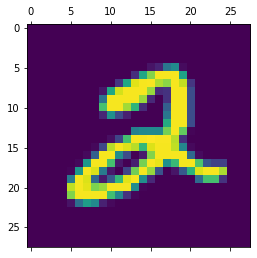

In [3]:
plt.matshow(X_train[5])

In [4]:
# Now lets normalize data
X_train = X_train/255
X_test = X_test/255

In [5]:
X_train.shape
# X_test.shape

(60000, 28, 28)

In [6]:
# Now reshape my data in 3D
X_train_flatten = X_train.reshape((60000,28*28))
X_test_flatten = X_test.reshape((10000,28*28))

In [22]:
X_test_flatten.shape
# X_test.shape

(10000, 784)

In [ ]:
X_train_flatten[0]

In [9]:
from keras.models import Sequential
from tensorflow.keras import layers

In [23]:
from tensorflow.python import metrics
from keras.mixed_precision.loss_scale_optimizer import optimizer_utils
model = keras.Sequential([
    layers.Dense(500, activation='sigmoid', input_shape=(784,)),
    layers.Dense(units=300, activation='sigmoid'),
    layers.Dense(units=10, activation='sigmoid')
])

In [24]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.fit(X_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3414 - accuracy: 0.8988
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1429 - accuracy: 0.9570
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0919 - accuracy: 0.9717
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0643 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0462 - accuracy: 0.9851


In [26]:
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0759 - accuracy: 0.9775


[0.07588869333267212, 0.9775000214576721]

In [28]:
y_pred = model.predict(X_test_flatten)

313/313 [==============================] - 0s 1ms/step


In [29]:
y_pred[:5]

array([[4.14505303e-02, 1.28917664e-01, 7.56939650e-01, 4.71676290e-01,
        4.03250428e-03, 9.81387962e-03, 4.26954955e-07, 9.99996543e-01,
        5.16176736e-03, 3.12133849e-01],
       [1.37214854e-01, 9.84602809e-01, 9.99925256e-01, 2.89297730e-01,
        3.34436045e-04, 4.85938117e-02, 5.77491485e-02, 1.98785830e-02,
        1.14624925e-01, 3.98958982e-05],
       [1.23357528e-03, 9.99987602e-01, 1.10092521e-01, 3.10041215e-02,
        3.12291626e-02, 6.46011382e-02, 2.13267833e-01, 5.67979515e-01,
        3.15739214e-01, 3.80990352e-03],
       [9.99957561e-01, 4.35691625e-02, 4.88717854e-02, 1.29983597e-03,
        2.38662474e-02, 5.58762588e-02, 7.20011413e-01, 8.97311121e-02,
        5.44256717e-03, 2.40251094e-01],
       [1.18334880e-02, 5.71777718e-03, 3.51773538e-02, 1.68292114e-04,
        9.99983311e-01, 4.53379750e-03, 1.67813838e-01, 4.54539090e-01,
        8.58158153e-03, 9.08186853e-01]], dtype=float32)

In [30]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[7, 2, 1, 0, 4]

In [84]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [88]:
from sklearn.metrics import accuracy_score

# convert predictions and actual labels to 1-D array
y_pred = model.predict(X_test_flatten)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test)

# calculate accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)


313/313 [==============================] - 1s 2ms/step
Accuracy:  0.9775


In [105]:
import pandas as pd

# create a dataframe to store the comparison
df = pd.DataFrame(columns=['Image','Predicted Label'])

# iterate through the dataset and add the image and predicted label to the dataframe
for i in range(len(y_test)):
    df = df.append({'Image': y_test[i], 'Predicted Label': y_pred[i]}, ignore_index=True)

# display the dataframe
print(df)


     Image Predicted Label
0        7               7
1        2               2
2        1               1
3        0               0
4        4               4
...    ...             ...
9995     2               2
9996     3               3
9997     4               4
9998     5               5
9999     6               6

[10000 rows x 2 columns]
